In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# 最急降下法

In [2]:
# data
df = pd.read_csv('sample_data.csv')
print(df.shape)
df.head(3)

(10, 2)


,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='space', ylabel='rent'>

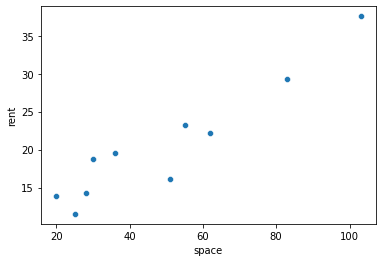

In [3]:
# scatterplot
sns.scatterplot('space', 'rent', data=df)

In [4]:
# 損失関数
def cost_func(theta_0, theta_1, x, y):
    diff_squared = np.square(y - (theta_0 + theta_1*x))
    return np.mean(diff_squared)

# def cost_func(val1, val2, xi, yi):
#     diff_list = []
#     for x, y in zip(xi, yi):
#         diff = (y - (val1 + val2*x))**2
#         diff_list.append(diff)
#     return np.mean(diff_list)

In [5]:
cost = cost_func(10, 0.1, df['space'], df['rent'])
cost

59.21797278616354

## 可視化

In [6]:
from itertools import product

x = df['space']
y = df['rent']
theta_0 = np.linspace(-20, 20, 100)
theta_1 = np.linspace(-1, 1, 100)
cost = [cost_func(*param, x=x, y=y) for param in product(theta_0, theta_1)]
np.array(cost).shape

(10000,)

In [7]:
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
cost = np.array(cost).reshape(theta_1_ax.shape)
print(theta_0_ax.shape, theta_1_ax.shape, cost.shape)

(100, 100) (100, 100) (100, 100)


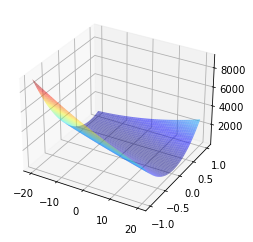

In [8]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, cost, cmap='jet', alpha=0.5)

In [9]:
list(product(theta_0, theta_1))[:5]

[(-20.0, -1.0),
 (-20.0, -0.9797979797979798),
 (-20.0, -0.9595959595959596),
 (-20.0, -0.9393939393939394),
 (-20.0, -0.9191919191919192)]

In [10]:
theta_0_ax

array([[-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       ...,
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ]])

## パラメータ更新の実装

In [11]:
def update_theta(theta_0, theta_1, alpha, x, y):
    theta_0_updated = theta_0 - (alpha * np.mean((theta_0 + theta_1*x - y))*2)
    theta_1_updated = theta_1 - (alpha * np.mean((theta_0 + theta_1*x - y)*x)*2)
    return theta_0_updated, theta_1_updated

In [12]:
# update_history = []
epochs = 100000
alpha = 5e-5
# loss_min, theta_0_min, theta_1_min = None, None, None
theta_0_int = -5
theta_1_int = -0.5
x = df['space']
y = df['rent']
theta_0_hist = []
theta_1_hist = []
theta_0_hist.append(theta_0_int)
theta_1_hist.append(theta_1_int)

for _ in range(epochs):
    theta_0, theta_1 = update_theta(theta_0_hist[-1], theta_1_hist[-1], alpha, x, y)
    theta_0_hist.append(theta_0)
    theta_1_hist.append(theta_1)

# for _ in range(epochs):
#     loss = cost_func(theta_0, theta_1, x, y)
#     update_history.append({f'theta_0: {theta_0}, theta_1: {theta_1}': loss})
#     theta_0, theta_1 = update_theta(theta_0, theta_1, alpha, x, y)

# print(f'loss_min: {loss_min}, theta_0: {theta_0_min}, theta_1: {theta_1_min}')

In [13]:
print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


In [14]:
hist_set = set(theta_0_hist)
len(hist_set)

100001

## 推移をプロット

In [15]:
cost_hist = [cost_func(*param, x=x, y=y) for param in zip(theta_0_hist, theta_1_hist)]

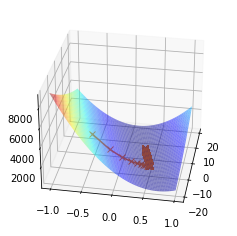

In [16]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, cost, cmap='jet', alpha=0.5)
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

Text(0, 0.5, 'theta_0')

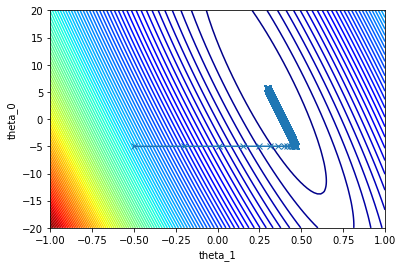

In [17]:
plt.contour(theta_1_ax.T, theta_0_ax.T, cost, levels=100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel('theta_1')
plt.ylabel('theta_0')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


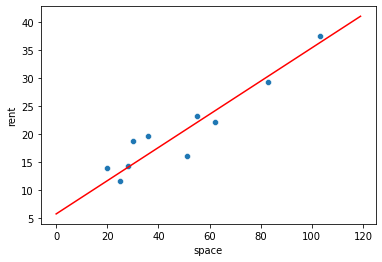

In [18]:
sns.scatterplot('space', 'rent', data=df)
diff_squared = np.square(y - (theta_0 + theta_1*x))

x_value = np.arange(120)
y_value = theta_0_hist[-1] + theta_1_hist[-1]*x_value

plt.plot(x_value, y_value, 'r')

# 正規方程式

In [19]:
# 行列Xを作成
x0 = np.ones((len(df), 1))
x1 = np.array(df['space']).reshape(-1, 1)
X = np.concatenate((x0, x1), axis=1)
X.shape

(10, 2)

In [20]:
y = df['rent'].values.reshape(-1, 1)
y.shape

(10, 1)

In [21]:
best_theta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
best_theta.shape

(2, 1)

In [22]:
best_theta

array([[7.0962325 ],
       [0.27487161]])

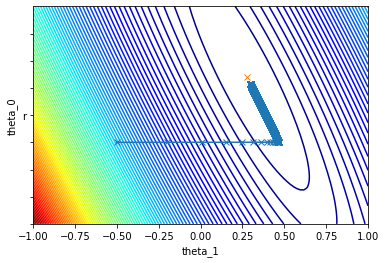

In [23]:
plt.contour(theta_1_ax.T, theta_0_ax.T, cost, levels=100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel('theta_1')
plt.ylabel('theta_0')
plt.plot(best_theta[1], best_theta[0], 'x', 'r')

# 等高線がおかしいので軸の設定をいじる
plt.xlim(-1, 1)
plt.ylim(-20, 20)
plt.yticks(np.arange(-20, 20, 5))
plt.show()

# scikit-learnで線形回帰

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
# X は行列の形でなければならない
X = df['space'].values.reshape(-1, 1)
X.shape

(10, 1)

In [27]:
y = df['rent'].values
y.shape

(10,)

In [28]:
model.fit(X, y)

LinearRegression()

In [29]:
model.predict(np.array(27).reshape(-1, 1))

array([14.51776595])

In [30]:
# theta_1
model.coef_

array([0.27487161])

In [31]:
# theta_0
model.intercept_

7.0962324999088295

# 特徴量スケーリング

## 標準化

In [32]:
df = pd.read_csv('sample_data2.csv')
df.head(3)

,space,rent,age
0,20,13.958824,3
1,25,11.533805,13
2,28,14.269547,18


In [33]:
X = df[['space', 'age']]
X.head(3)

,space,age
0,20,3
1,25,13
2,28,18


In [34]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [35]:
scaler.fit(X)

StandardScaler()

In [36]:
X_scaled = scaler.transform(X)

In [37]:
pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,-1.134662,-0.806277
1,-0.941034,0.633504
2,-0.824857,1.353394
3,-0.747405,0.201569
4,-0.515051,-0.374343
5,0.065834,-1.094233
6,0.220736,-0.518321
7,0.491816,-0.950255
8,1.305055,-0.518321
9,2.079569,2.073284


In [38]:
# 線形回帰で学習
from sklearn.linear_model import LinearRegression

y = df['rent']
model = LinearRegression()
model.fit(X_scaled, y)
model.predict([[38, 10]])

array([291.65995715])

## 正規化

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[0.        , 0.09090909],
       [0.06024096, 0.54545455],
       [0.09638554, 0.77272727],
       [0.12048193, 0.40909091],
       [0.19277108, 0.22727273],
       [0.37349398, 0.        ],
       [0.42168675, 0.18181818],
       [0.5060241 , 0.04545455],
       [0.75903614, 0.18181818],
       [1.        , 1.        ]])

In [40]:
pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,0.000000,0.090909
1,0.060241,0.545455
2,0.096386,0.772727
3,0.120482,0.409091
4,0.192771,0.227273
5,0.373494,0.000000
6,0.421687,0.181818
7,0.506024,0.045455
8,0.759036,0.181818
9,1.000000,1.000000


# 線形回帰の解釈

In [41]:
# data
df = pd.read_csv('sample_data2.csv')
y_col = 'rent'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
X.head(3)

,space,age
0,20,3
1,25,13
2,28,18


In [42]:
# 線形回帰
import statsmodels.api as sma

# バイアス項の追加
X = sma.add_constant(X)
X.head(3)

,const,space,age
0,1.0,20,3
1,1.0,25,13
2,1.0,28,18


In [43]:
est = sma.OLS(y, X)
est_trained = est.fit()
est_trained.summary()

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           0.000282
Time:                        02:23:02   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.016       1.584      11.246
space          0.2677      0.035      7.622      0.000       0.185       0.351
age            0.1206      0.131      0.924      0.386      -0.188       0.429
==============================================================================
Omnibus:                        0.981   Durbin-Watson:                   2.514
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.734
Skew:                          -0.364   Prob(JB):                        0.693
Kurtosis:                       1.890   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

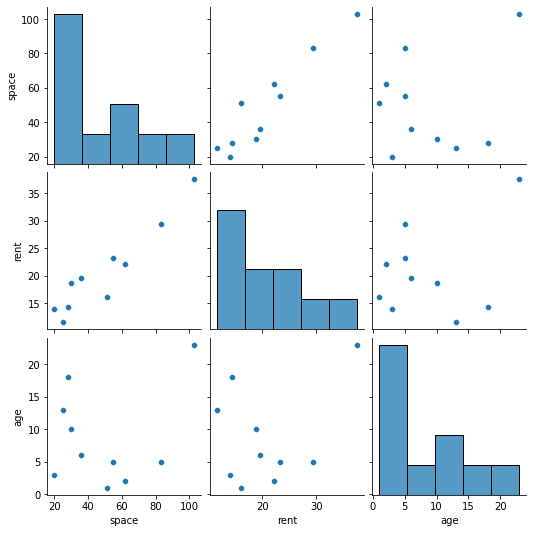

In [44]:
sns.pairplot(df)

In [45]:
# 標準化
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=[y_col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sma.add_constant(X_scaled)
X_scaled

array([[ 1.        , -1.13466215, -0.8062772 ],
       [ 1.        , -0.9410338 ,  0.63350351],
       [ 1.        , -0.82485679,  1.35339387],
       [ 1.        , -0.74740544,  0.2015693 ],
       [ 1.        , -0.51505142, -0.37434298],
       [ 1.        ,  0.06583364, -1.09423334],
       [ 1.        ,  0.22073632, -0.51832106],
       [ 1.        ,  0.49181602, -0.95025527],
       [ 1.        ,  1.3050551 , -0.51832106],
       [ 1.        ,  2.07956852,  2.07328422]])

In [46]:
est = sma.OLS(y, X_scaled)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           0.000282
Time:                        02:23:03   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# ダミー変数

In [47]:
df = pd.read_csv('sample_data3.csv')
df.head(3)

,space,rent,age,facing_direction
0,20,13.958824,3,South
1,25,11.533805,13,South
2,28,14.269547,18,North


In [48]:
df['facing_direction'].drop_duplicates()

0    South
2    North
3     West
6     East
Name: facing_direction, dtype: object

In [49]:
df = pd.get_dummies(df, drop_first=True)
df.head(3)

,space,rent,age,facing_direction_North,facing_direction_South,facing_direction_West
0,20,13.958824,3,0,1,0
1,25,11.533805,13,0,1,0
2,28,14.269547,18,1,0,0


In [50]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, df.columns!=y_col]
y = df[y_col]
model = LinearRegression()
model.fit(X, y)
model.predict([[22, 10, 0, 0, 0]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.13887097])

# hold-out

In [51]:
df = sns.load_dataset('tips')
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [52]:
df.shape

(244, 7)

In [53]:
y_col = 'tip'
X = df.drop(y_col, axis=1)
X[:3]

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3


In [54]:
# 標準化のために数値カラムだけを取得する
numeric_cols = X.select_dtypes(include=np.number)
numeric_cols[:3]

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3


In [55]:
X.dtypes

total_bill     float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [56]:
# カラムだけ取り出し、リスト化する
numeric_cols = numeric_cols.columns.to_list()
numeric_cols

['total_bill', 'size']

In [57]:
# ダミー変数化
X = pd.get_dummies(X, drop_first=True)
X[:3]

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1


In [58]:
y = df[y_col]
y[:3]

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [60]:
X_train.shape

(170, 8)

In [61]:
y_train.shape

(170,)

In [62]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 数値のカラムに対してのみ標準化させる
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [63]:
X_train_scaled.head(3)

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
61,-0.682321,-0.616436,0,0,0,1,0,1
146,-0.152575,0.463915,1,1,0,0,0,0
52,1.620922,1.544266,1,1,0,0,1,1


In [64]:
X_test_scaled.head(3)

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
64,-0.267738,0.463915,0,1,0,1,0,1
63,-0.190963,1.544266,0,0,0,1,0,1
55,-0.059349,-0.616436,0,1,0,0,1,1


In [65]:
# 線形回帰モデルで学習、予測、評価
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

0.9550808988617148

# LOOCV(Leave-One-Out-Cross-Validation)

In [66]:
from sklearn.model_selection import LeaveOneOut

X = df['total_bill'].values.reshape(-1, 1)
y = df['tip']

In [67]:
loo = LeaveOneOut()

In [68]:
list(loo.split(X))[5]

(array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [69]:
model = LinearRegression()
mse_list = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # モデル学習
    model.fit(X_train, y_train)
    # テストデータの予測
    y_pred = model.predict(X_test)
    # MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

In [70]:
print(np.mean(mse_list))
print(np.std(mse_list))

1.0675673489857436
2.099794455177631


In [71]:
# cross_val_scoreを使用する
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error',  n_jobs=-1)

In [72]:
print(-np.mean(scores))
print(np.std(scores))

1.0675673489857436
2.099794455177631


# K-Fold CV

In [73]:
from sklearn.model_selection import KFold

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=0)
model = LinearRegression()
mse_list = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # モデル学習
    model.fit(X_train, y_train)
    # テストデータ予測
    y_pred = model.predict(X_test)
    # MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

In [74]:
# MSEの平均を算出
print(f'MSE({k}-Fold CV): {np.mean(mse_list)}')
print(f'STD: {np.std(mse_list)}')

MSE(5-Fold CV): 1.0802110883943918
STD: 0.16170100507039514


In [75]:
# cross_val_scoreを使用する場合
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores

array([-0.82130906, -1.07458421, -1.08801239, -1.33238677, -1.084763  ])

In [76]:
print(f'MSE({k}-Fold CV): {np.mean(scores)}')
print(f'STD: {np.std(scores)}')

MSE(5-Fold CV): -1.0802110883943918
STD: 0.16170100507039514


### repeated K-Fold CV

In [77]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
model = LinearRegression()
mse_list = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # モデル学習
    model.fit(X_train, y_train)
    # テストデータ予測
    y_pred = model.predict(X_test)
    # MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

print(len(mse_list))
print(f'MSE(repeated {k}-Fold CV): {np.mean(mse_list)}')
print(f'STD: {np.std(mse_list)}')

15
MSE(repeated 5-Fold CV): 1.0746387233165984
STD: 0.26517178540898434


## Pipeline

In [78]:
# pipeline + KFold
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

cv = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=cv)

scores

array([-0.82130906, -1.07458421, -1.08801239, -1.33238677, -1.084763  ])

In [79]:
# pipelineなしで標準化 + 線形回帰
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
model = LinearRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred[:5]

array([2.71486884, 2.78639251, 2.90900452, 1.65836207, 2.57999564])

In [81]:
# pipelineあり
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred[:5]

array([2.71486884, 2.78639251, 2.90900452, 1.65836207, 2.57999564])

In [82]:
# 自動で標準化と線形回帰を組み込んだPipelineの継承クラスを練習で作成
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler


class Pipeline_Re(Pipeline):
    def __init__(self, steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())]):
        super().__init__(steps=steps)

        
# Xの説明変数を増やしてみる
df_dia = sns.load_dataset('diamonds')
X = df_dia[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df_dia['price']
model = LinearRegression()

# Pipeline_Reなし、標準化なし
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred[:3])

# Pipeline_Reなし、標準化あり
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y ,test_size=0.3, random_state=0)
scaler = MinMaxScaler()
X_train_2_scaled = scaler.fit_transform(X_train_2)
X_test_2_scaled = scaler.transform(X_test_2)
model.fit(X_train_2_scaled, y_train_2)
y_pred_2 = model.predict(X_test_2_scaled)
print(y_pred_2[:3])

# Pipeline_Reあり
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y ,test_size=0.3, random_state=0)
pipeline_re = Pipeline_Re()
pipeline_re.fit(X_train_3, y_train_3)
y_pred_3 = pipeline_re.predict(X_test_3)
print(y_pred_3[:3])

[6301.6066154  7667.3572216  6893.40919843]
[6301.6066154  7667.3572216  6893.40919843]
[6301.6066154  7667.3572216  6893.40919843]


# Regression Metrics（回帰の評価指標）

In [88]:
# data準備
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = sns.load_dataset('tips')
X = df['total_bill'].values.reshape(-1, 1)
y = df['tip'].values

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# train
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
y_pred[:5]

array([2.71486884, 2.78639251, 2.90900452, 1.65836207, 2.57999564])

In [89]:
# MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

0.8711845537539947

In [91]:
# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.933372676777071

In [92]:
# MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

0.6903119067790222

In [93]:
# R-Squared（決定係数）
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.49515102188632776

# 非線形回帰

## 多項式特徴量

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

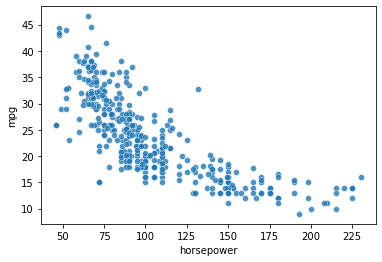

In [108]:
df = sns.load_dataset('mpg')
df = df.dropna()
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
sns.scatterplot(df['horsepower'], df['mpg'], alpha=0.8)

In [113]:
# 多項式特徴量
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [114]:
# 線形回帰
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


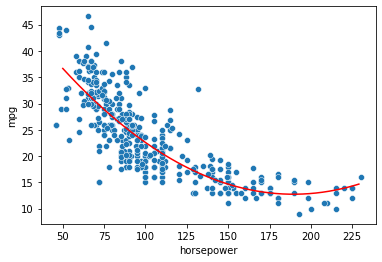

In [117]:
# 描画
x_axis = np.arange(50, 230).reshape(-1, 1)
x_axis_poly = poly.fit_transform(x_axis)
pred = model.predict(x_axis_poly)
sns.scatterplot(df['horsepower'], df['mpg'])
plt.plot(x_axis, pred, 'r')

In [174]:
# cross_val_scoreを使用しないバージョン

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold

# data
df = sns.load_dataset('mpg')
df = df.dropna()
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

# repeated K-Foldを定義
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

# 線形回帰を定義
model = LinearRegression()

# 多項式特徴量
mse_mean_list = []
n = 3
for n in range(n):
    poly = PolynomialFeatures(n + 1)
    X_poly = poly.fit_transform(X)
    mse_list = []
    for train_index, test_index in cv.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    mse_mean_list.append({f'degree={n+1}': np.mean(mse_list)})

In [175]:
mse_mean_list

[{'degree=1': 24.235391801372007},
 {'degree=2': 19.294969517171612},
 {'degree=3': 19.433811692960596}]

In [179]:
# cross_val_scoreを使用するバージョン

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, RepeatedKFold

# data
df = sns.load_dataset('mpg')
df = df.dropna()
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']

# repeated K-Foldを定義
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

# 線形回帰を定義
model = LinearRegression()

# 多項式特徴量
result = {}
n = 3
for n in range(n):
    poly = PolynomialFeatures(n + 1)
    X_poly = poly.fit_transform(X)
    scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    result[f'degree {n}'] = {'score_mean': np.mean(scores), 'score_std': np.std(scores)}

In [180]:
pd.DataFrame(result)

,degree 0,degree 1,degree 2
score_mean,-24.235392,-19.294970,-19.433812
score_std,3.346678,4.413627,4.508224


In [198]:
# pipelineを使用する場合

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# data
df = sns.load_dataset('mpg')
df = df.dropna()
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']

# repeated K-Foldを定義
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

# 多項式特徴量
result = {}
n = 3
for n in range(n):
    # pipelineを設定
    pipeline = Pipeline(steps=[('poly', PolynomialFeatures(n + 1)), ('model', LinearRegression())])
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    result[f'degree {n}'] = {'score_mean': np.mean(scores), 'score_std': np.std(scores)}

In [199]:
pd.DataFrame(result)

,degree 0,degree 1,degree 2
score_mean,-24.235392,-19.294970,-19.433812
score_std,3.346678,4.413627,4.508224


# kNN回帰（k近傍法）

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='mpg'>

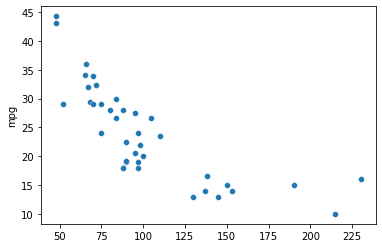

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
sns.scatterplot(X_train[:, 0], y_train)

In [210]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


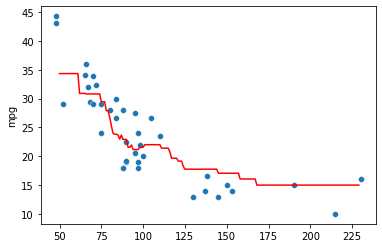

In [214]:
x_axis = np.arange(50, 230).reshape(-1, 1)
y_pred = model.predict(x_axis)
sns.scatterplot(X_train[:, 0], y_train)
plt.plot(x_axis, y_pred, 'r')

Text(0, 0.5, 'mean squared error')

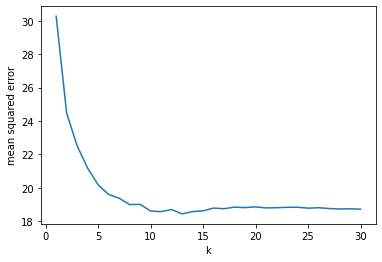

In [234]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

# data
df = sns.load_dataset('mpg')
df = df.dropna()
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

score_list = []
k_list = np.arange(1, 31)
for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    score_list.append(np.mean(-scores))

plt.plot(k_list, score_list)
plt.xlabel('k')
plt.ylabel('mean squared error')

In [236]:
print(f'Best performance: k={np.argmin(score_list)}, mse={np.min(score_list):.2f}')

Best performance: k=12, mse=18.44


# 正則化項

## Ridge（L2ノルム）

In [256]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('Hitters.csv')

# 欠損値対応
df.dropna(inplace=True)

In [257]:
# data
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
# 標準化のために数値カラムのリストを作成
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
# ダミー変数（数値カラム作成の後に行う）
X = pd.get_dummies(X, drop_first=True)
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
# モデル学習
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# mse
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'mse: {mse}, mae: {mae}')

mse: 118513.2613545657, mae: 251.0105804238486


In [258]:
model.coef_
# 標準化しているので、係数が大きい程、影響が大きい

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

In [262]:
# 線形回帰との比較
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)
print(f'mse_linear: {mse_linear}, mae_linear: {mae_linear}')

mse_linear: 118513.2613545657, mae_linear: 251.0105804238486


In [263]:
model_linear.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

In [307]:
# λを変化させてみる
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Hitters.csv')
df = df.dropna()
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
# 標準化のために数値データのカラムリスト作成
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
# ダミー変数
X = pd.get_dummies(X, drop_first=True)
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 学習・予測
# alpha_list = np.linspace(10**-3, 10**3, 100)
alpha_list = np.logspace(-3, 3)
mse_list = []
coef_list = []
for i in alpha_list:
    model = Ridge(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    coef = model.coef_
    mse_list.append(mse)
    coef_list.append(coef)

Text(0, 0.5, 'MSE')

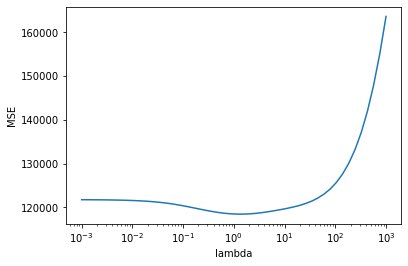

In [310]:
# MSEの推移を可視化
plt.plot(alpha_list, mse_list)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('MSE')

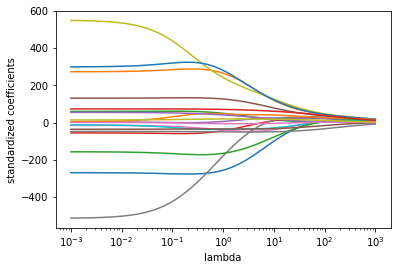

In [313]:
# 係数の推移を可視化
plt.plot(alpha_list, coef_list)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('standardized coefficients')
plt.show()

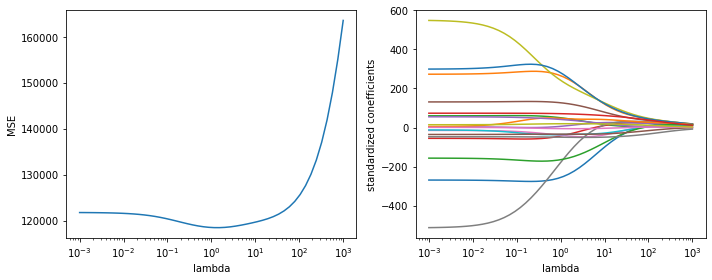

In [331]:
# サブプロットを使用して並列で可視化
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(alpha_list, mse_list)
axes[0].set_xscale('log')
axes[0].set_xlabel('lambda')
axes[0].set_ylabel('MSE')
axes[1].plot(alpha_list, coef_list)
axes[1].set_xscale('log')
axes[1].set_xlabel('lambda')
axes[1].set_ylabel('standardized conefficients')
fig.tight_layout()
plt.show()

## Lasso（L1ノルム）

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# data
df = pd.read_csv('Hitters.csv')
df = df.dropna()
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]

# 標準化のために数値カラムだけ抽出
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# ダミー変数化
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Lassoによる学習、予測
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 117768.90478161347, MAE: 250.24481877112987


In [21]:
model.coef_

array([-263.93470404,  267.52882597,   42.60344047,  -33.86419872,
          7.61638806,  125.23251733,  -29.82564501, -239.24447846,
        330.30504107,   -4.11414372,  259.64536978,    0.        ,
       -160.99905107,   71.08401856,   40.14808014,  -30.18012969,
          0.        ,  -93.87340542,   25.7211037 ])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.495e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.067e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.716e+06, toleranc

,coef,column_name
0,-258.654254,AtBat
1,262.703341,Hits
2,28.269934,HmRun
3,-15.642275,Runs
4,10.668062,RBI
5,119.976146,Walks
6,-42.540124,Years
7,-1.809967,CAtBat
8,135.784321,CHits
9,-0.000000,CHmRun


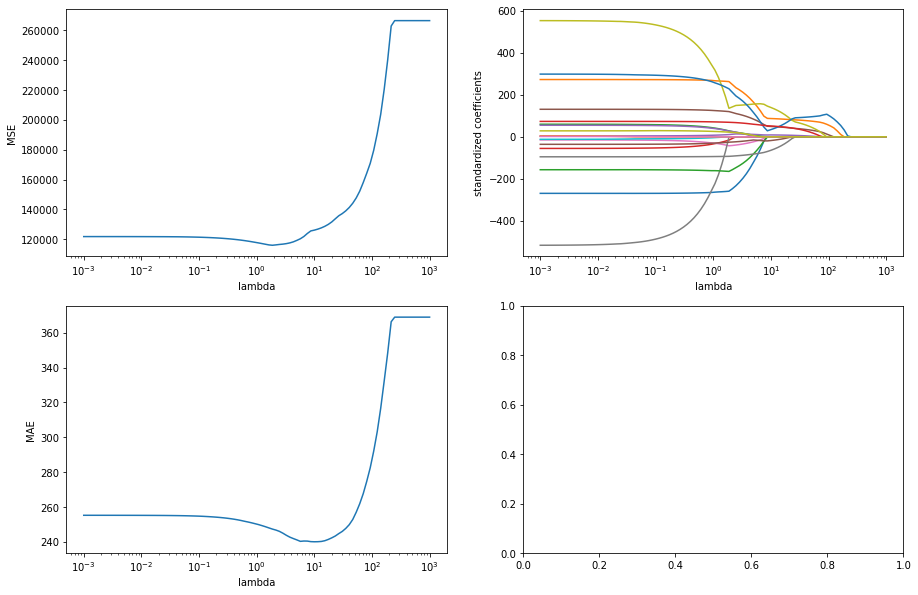

In [112]:
# λを変化させてみる
df = pd.read_csv('Hitters.csv')
df = df.dropna()
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]

# 標準化のために数値カラムを抽出する
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()

# ダミー変数化
X = pd.get_dummies(X, drop_first=True)

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Lassoによる学習・予測
mse_list = []
coef_list = []
mae_list = []
alphas = np.logspace(-3, 3, 100)
for i in alphas:
    model = Lasso(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coef_list.append(model.coef_)
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

# 可視化
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# MSE
axes[0, 0].plot(alphas, mse_list)
axes[0, 0].set_xlabel('lambda')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_xscale('log')
# Standardized Coefficients
axes[0, 1].plot(alphas, coef_list)
axes[0, 1].set_xlabel('lambda')
axes[0, 1].set_ylabel('standardized coefficients')
axes[0, 1].set_xscale('log')
# MAE
axes[1, 0].plot(alphas, mae_list)
axes[1, 0].set_xlabel('lambda')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_xscale('log')

# 最適なlambda
best_alpha = alphas[np.argmin(mse_list)]
lasso = Lasso(best_alpha)
lasso.fit(X_train, y_train)
pd.DataFrame({'coef': lasso.coef_, 'column_name': X_train.columns.to_list()})

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.031e+06, tolerance: 3.759e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.220e+06, tolerance: 4.201e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e+06, toleranc

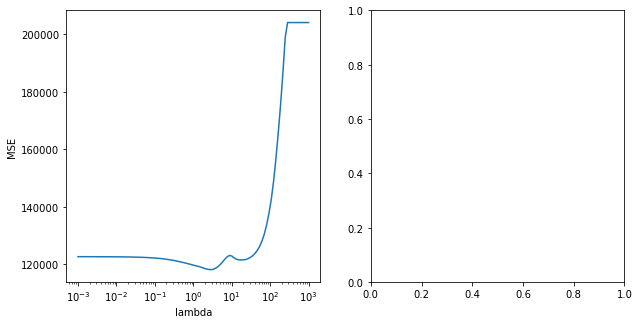

In [104]:
# K-Foldを使うとしたら
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline

df = pd.read_csv('Hitters.csv')
df = df.dropna()
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]

# 標準化のために数値カラムを抽出する
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()

# ダミー変数化
X = pd.get_dummies(X, drop_first=True)

# Repeated K-Fold
k = 5
repeat = 3
cv = RepeatedKFold(n_splits=k, n_repeats=repeat, random_state=0)

# pipelineの前処理
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_cols)])

# 学習・予測
mse_list = []
coef_list = []
alphas = np.logspace(-3, 3, 100)
for i in alphas:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', Lasso(alpha=i))])
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    mse_list.append(-np.mean(scores))
    # coef_list.append(pipeline.named_steps['model'].coef_)

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# MSE
axes[0].plot(alphas, mse_list)
axes[0].set_xlabel('lambda')
axes[0].set_ylabel('MSE')
axes[0].set_xscale('log')
# Standardized Coefficients
# axes[1].plot(alphas, coef_list)
# axes[1].set_xlabel('lambda')
# axes[1].set_ylabel('standardized coefficients')
# axes[1].set_xscale('log')